<h3>Практическое задание №2. Запрос на ресурсы</h3>

<h6>Для параметров п.1 практического задания №1, определите размер запрашиваемых
ресурсов АУ T в первичных ресурсных блоках (размер блока – 1.44 МГц), которое
находится на расстоянии R/2 от БС и требует для передачи 20 Мбит/с.</h6>

In [37]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [38]:
hB = 10;
hU = 1.5;
fC = 28;
Pt = 10 * m.log(2e3, 10);
GB = 10;
GU = 2;
E = 2.1;
N0 = -174;
B = 400e6;
Pr = -9.4;

def getNoiseByB(B):
    return N0 + 10 * m.log(B, 10);
def getMaxRByB(B):
    Ldb = Pt + GB + GU - Pr - getNoiseByB(B);
    VR = 10 ** ((Ldb - 32.4 - 20 * m.log(fC, 10)) / (10 * E));
    return m.sqrt(VR ** 2 - (hB - hU) ** 2);
# дико скопировано с первой лабораторной

def Ldb(r):
    return 32.4 + 10 * E * m.log(r, 10) + 20 * m.log(fC, 10);

def getRBByRDivisor(d):
    r = getMaxRByB(B) / d;
    n = m.log(1 + 10 ** ((Pt + GU + GB - Ldb(r) - getNoiseByB(1.44e6)) / 10), 2); # Спектральная эффективность
    Crb = 1.44 * n;
    print("Для запрашиваемой скорости в 20Мбит/c требуется %d ресурсных блоков для расстояния %.2f" %(m.ceil(20/Crb), r));
    
getRBByRDivisor(2);

Для запрашиваемой скорости в 20Мбит/c требуется 2 ресурсных блоков для расстояния 3616.84


<h6>Определите количество требуемых ресурсов для АУ, которое требует скорость 20
Мбит/с также для расстояний от БС R/10 и R. Объясните разницу.</h6>

In [39]:
getRBByRDivisor(10);
getRBByRDivisor(1);

Для запрашиваемой скорости в 20Мбит/c требуется 2 ресурсных блоков для расстояния 723.37
Для запрашиваемой скорости в 20Мбит/c требуется 3 ресурсных блоков для расстояния 7233.67


Чем больше расстояние, тем:
1) больше потери с расстоянием
2) меньше отношение сигнал-шум
3) меньше спектральная эффективность    
и, следовательно, нужно больше ресурсных блоков.

<h6>Предполагая, что полоса пропускания B доступная на БС изменяется от 20 до 400 МГц,
постройте график максимального количества АУ, которые могут быть обслужены, если
они все располагаются на дистанции R/10, R/2 и R. Объясните полученные результаты.</h6>

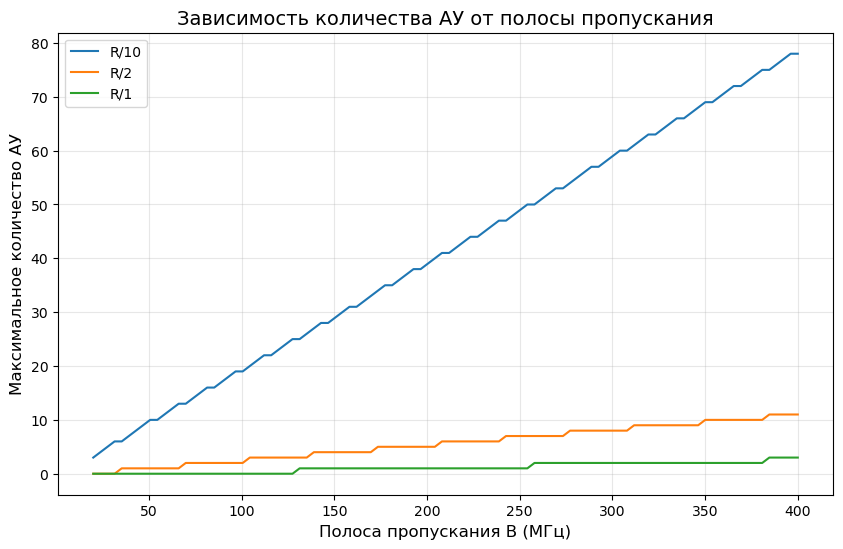

In [40]:
B_values = np.linspace(20, 400, 100);
R_user = 20;

def getEta(r, B):
    N = getNoiseByB(B);
    SNR_dB = Pt + GU + GB - Ldb(r) - N;
    SNR_linear = 10 ** (SNR_dB / 10);
    return m.log2(1 + SNR_linear);

def getMaxUsers(r, B):
    eta = getEta(r, B);
    C_total = B * eta;
    return int(C_total / R_user);

plt.figure(figsize=(10, 6))
for d in [10, 2, 1]:
    N_users = [];
    for B in B_values:
        R = getMaxRByB(B);
        r = R / d;
        N_users.append(getMaxUsers(r, B));
    plt.plot(B_values, N_users, label=f"R/{d}");

plt.xlabel("Полоса пропускания B (МГц)", fontsize=12);
plt.ylabel("Максимальное количество АУ", fontsize=12);
plt.title("Зависимость количества АУ от полосы пропускания", fontsize=14);
plt.legend();
plt.grid(alpha=0.3);
plt.show();

Аналогично второму пункту, независимо от параметров БС, АУ, которые находятся ближе, обходятся "дешевле" для БС, т.к. её ресурсы становятся доступнее большему кругу АУ для достижения константной скорости